In [1]:
import pandas as pd
import numpy as np

# 處理 Option IV Data: 日頻率改為月頻率、缺失值填補與刪除

In [23]:
option_iv = pd.read_csv('option_variables.csv')
option_iv['year_month'] = pd.to_datetime(option_iv['year_month'])
option_iv['year_month'] = option_iv['year_month'].dt.to_period('M')
option_iv

,year_month,PERMNO,RI_Spread,CP_Spread,Skew
0,1996-02,10078,0.144319,0.002684,0.005677
1,1996-02,10104,0.126637,-0.003858,0.044311
2,1996-02,10107,0.119546,-0.002361,0.019742
3,1996-02,10138,0.033517,-0.009984,-0.012645
4,1996-02,10145,0.079896,0.000718,0.014966
...,...,...,...,...,...
428919,2023-01,93356,0.117635,0.005960,0.030534
428920,2023-01,93374,0.086463,-0.058625,0.054864
428921,2023-01,93423,0.024184,-0.000071,0.041017
428922,2023-01,93429,0.010246,-0.010348,0.064517


# Merge All X Variables

In [26]:
chmom = pd.read_pickle('chmom.pickle')
dolvol = pd.read_pickle('dolvol.pickle')
idiovol = pd.read_pickle('idiovol.pickle')
indmom = pd.read_pickle('indmom.pickle').drop(columns = ['SICCD', 'industry'])
maxret = pd.read_pickle('maxret.pickle')
momentum = pd.read_pickle('momentum.pickle')
mvel1 = pd.read_pickle('mvel1.pickle').drop(columns = ['stockmv'])
retvol = pd.read_pickle('retvol.pickle')

In [32]:
df_list = [option_iv, chmom, dolvol, idiovol, indmom, maxret, momentum, mvel1, retvol]
result = df_list[0]

for df in df_list[1:]:
    result = pd.merge(result, df, on=['PERMNO', 'year_month'], how = 'outer')
    
result = result.sort_values(['year_month', 'PERMNO']).dropna().reset_index(drop = True)

result

,year_month,PERMNO,RI_Spread,CP_Spread,Skew,chmom,dolvol,Idiovol,indmom,maxret,mom1m,mom12m,mvel1,retvol
0,1996-02,10078,0.144319,0.002684,0.005677,0.442206,23.414398,0.000976,0.057989,0.105611,0.008220,1.809151,0.001254,0.052739
1,1996-02,10104,0.126637,-0.003858,0.044311,-0.333304,22.851195,0.0006,0.026398,0.062162,0.126844,0.680358,0.003070,0.032124
2,1996-02,10107,0.119546,-0.002361,0.019742,-0.502109,23.748948,0.000414,0.026398,0.051593,0.054131,0.557894,0.008288,0.030397
3,1996-02,10138,0.033517,-0.009984,-0.012645,-0.378726,19.854400,0.000509,0.037903,0.087766,0.096445,0.997270,0.000216,0.032037
4,1996-02,10145,0.079896,0.000718,0.014966,-0.244465,20.855027,0.0002,0.031101,0.036842,0.050002,0.420980,0.002215,0.017638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395432,2022-12,93356,0.098913,0.007241,0.036844,0.569832,20.355046,0.000377,0.039053,0.102579,0.124410,0.009014,0.000119,0.030533
395433,2022-12,93369,1.011456,-0.021212,0.036561,-0.479824,21.420333,0.001784,0.039053,0.155405,-0.487543,-0.620068,0.000105,0.130839
395434,2022-12,93374,0.153718,0.045951,-0.008019,0.089910,20.939508,0.000187,0.052713,0.091373,0.084326,-0.238701,0.000139,0.028646
395435,2022-12,93423,0.016805,0.000618,0.043120,0.018219,21.482056,0.000913,0.039053,0.135319,0.080268,-0.341260,0.000047,0.045829


In [33]:
def normalize(group):
    # Your custom normalization logic goes here
    return (group - group.min()) / (group.max() - group.min())

# Select only the columns you want to normalize (excluding 'year_month' and 'PERMNO')
cols_to_normalize = ['RI_Spread', 'CP_Spread', 'Skew',
                     'chmom', 'dolvol', 'Idiovol', 'indmom', 
                     'maxret', 'mom1m', 'mom12m', 'mvel1', 'retvol']

# Group by 'year_month' and apply the custom normalization function to each group
result[cols_to_normalize] = result.groupby('year_month')[cols_to_normalize].transform(normalize)

print('Min-Max Normalized Data:')
display(result)

Min-Max Normalized Data:


,year_month,PERMNO,RI_Spread,CP_Spread,Skew,chmom,dolvol,Idiovol,indmom,maxret,mom1m,mom12m,mvel1,retvol
0,1996-02,10078,0.410379,0.665843,0.660771,0.809163,0.923366,0.163088,1.000000,0.304835,0.567332,0.238016,0.063198,0.534237
1,1996-02,10104,0.399722,0.651412,0.705032,0.711171,0.844706,0.096106,0.619444,0.165541,0.701425,0.125665,0.156297,0.302605
2,1996-02,10107,0.395449,0.654715,0.676885,0.689841,0.970092,0.062931,0.619444,0.131657,0.619231,0.113476,0.423907,0.283192
3,1996-02,10138,0.343600,0.637898,0.639781,0.705431,0.426155,0.079755,0.758034,0.247625,0.667062,0.157208,0.009942,0.301626
4,1996-02,10145,0.371552,0.661506,0.671413,0.722396,0.565909,0.024808,0.676100,0.084367,0.614563,0.099848,0.112486,0.139834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395432,2022-12,93356,0.201888,0.719230,0.265991,0.303625,0.391336,0.004968,0.189687,0.045434,0.246141,0.123820,0.001976,0.058314
395433,2022-12,93369,0.417082,0.700210,0.265746,0.196569,0.484192,0.028148,0.189687,0.070337,0.019417,0.044460,0.001744,0.275433
395434,2022-12,93374,0.214812,0.745106,0.227228,0.254677,0.442281,0.001835,0.287259,0.040151,0.231290,0.092570,0.002319,0.054230
395435,2022-12,93423,0.182525,0.714803,0.271413,0.247365,0.489572,0.013803,0.189687,0.060868,0.229787,0.079632,0.000772,0.091424


<Axes: xlabel='year_month'>

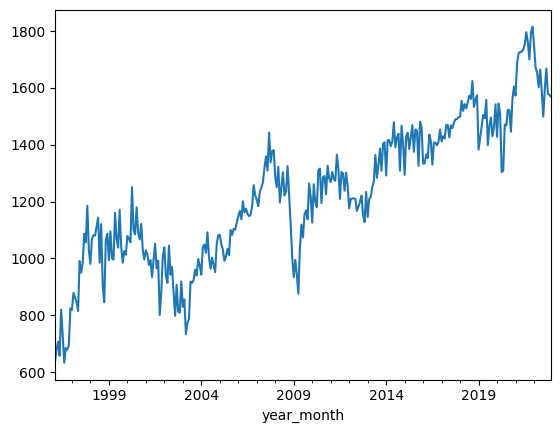

In [34]:
result.groupby('year_month').apply(lambda x: x['PERMNO'].nunique()).plot()

**Result 的資料都已經平移過，ex: year_month=1996-02 對應到的是 1996-01 資料的計算結果**

# y: Monthly Return

In [35]:
data = pd.read_pickle('CRSP.pickle')
df = data[['date', 'PERMNO', 'RET']].copy()

df['RET'] = pd.to_numeric(df['RET'], errors='coerce')
df.dropna(subset=['RET'], inplace=True)

df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')

df = df.sort_values(by=['PERMNO', 'year_month'])
df['log_ret'] = np.log(df['RET']+1)

month_ret = df.groupby(['PERMNO', 'year_month'])['log_ret'].sum().rename('month_log_ret').reset_index()
month_ret['month_ret'] = np.exp(month_ret['month_log_ret'])-1
month_ret = month_ret[['PERMNO', 'year_month', 'month_ret']]

display(month_ret)

,PERMNO,year_month,month_ret
0,10001,1995-01,-0.109158
1,10001,1995-02,0.037629
2,10001,1995-03,-0.029247
3,10001,1995-04,-0.051732
4,10001,1995-05,-0.000378
...,...,...,...
1623918,93436,2022-08,-0.072489
1623919,93436,2022-09,-0.037591
1623920,93436,2022-10,-0.142169
1623921,93436,2022-11,-0.144327


In [36]:
merged = pd.merge(result, month_ret, on=['PERMNO', 'year_month'], how = 'inner')
display(merged)
merged.to_csv('ready.csv')

,year_month,PERMNO,RI_Spread,CP_Spread,Skew,chmom,dolvol,Idiovol,indmom,maxret,mom1m,mom12m,mvel1,retvol,month_ret
0,1996-02,10078,0.410379,0.665843,0.660771,0.809163,0.923366,0.163088,1.000000,0.304835,0.567332,0.238016,0.063198,0.534237,0.141306
1,1996-02,10104,0.399722,0.651412,0.705032,0.711171,0.844706,0.096106,0.619444,0.165541,0.701425,0.125665,0.156297,0.302605,0.089004
2,1996-02,10107,0.395449,0.654715,0.676885,0.689841,0.970092,0.062931,0.619444,0.131657,0.619231,0.113476,0.423907,0.283192,0.066892
3,1996-02,10138,0.343600,0.637898,0.639781,0.705431,0.426155,0.079755,0.758034,0.247625,0.667062,0.157208,0.009942,0.301626,-0.004630
4,1996-02,10145,0.371552,0.661506,0.671413,0.722396,0.565909,0.024808,0.676100,0.084367,0.614563,0.099848,0.112486,0.139834,0.119871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395432,2022-12,93356,0.201888,0.719230,0.265991,0.303625,0.391336,0.004968,0.189687,0.045434,0.246141,0.123820,0.001976,0.058314,-0.097215
395433,2022-12,93369,0.417082,0.700210,0.265746,0.196569,0.484192,0.028148,0.189687,0.070337,0.019417,0.044460,0.001744,0.275433,0.209944
395434,2022-12,93374,0.214812,0.745106,0.227228,0.254677,0.442281,0.001835,0.287259,0.040151,0.231290,0.092570,0.002319,0.054230,-0.032653
395435,2022-12,93423,0.182525,0.714803,0.271413,0.247365,0.489572,0.013803,0.189687,0.060868,0.229787,0.079632,0.000772,0.091424,-0.034867
